Дыновский Антон Денисович ИУ7 - 16Б

Лаба 5

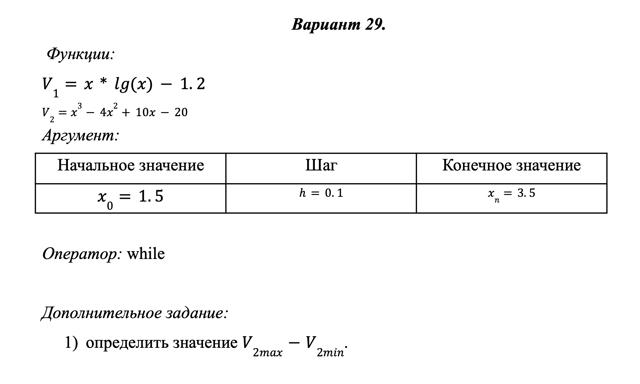

In [14]:
x0 = float(input("Введите начальное значение аргумента: "))
x = float(input("Введите конечное значение аргумента: "))
step = float(input("Введите значение шага разбиения отрезка: "))

In [15]:
from math import log10

print("-"*33)
print(f"| {"x":^5} | {"y1":^10} | {"y2":^7} |\n{'-'*33}")

max_y2 = min_y2 = x0**3 - 4*x0**2 + 10*x0 - 20
x_ticks_vals = []
y_vals = []
while x0 <= x:
    y1 = x0*log10(x0) - 1.2
    y2 = x0**3 - 4*x0**2 + 10*x0 - 20
    x_ticks_vals.append(x0)
    y_vals.append(y2)
    min_y2 = min(min_y2,y2)
    max_y2 = max(max_y2,y2)
    print(f"| {x0:^5g} | {y1:<10g} | {y2:<7g} |")
    x0 = round(x0+step,4)
print("-"*33) 
print(f"V2max - V2min = {max_y2 - min_y2}")

---------------------------------
|   x   |     y1     |   y2    |
---------------------------------
|  1.5  | -0.935863  | -10.625 |
|  1.6  | -0.873408  | -10.144 |
|  1.7  | -0.808237  | -9.647  |
|  1.8  | -0.740509  | -9.128  |
|  1.9  | -0.670368  | -8.581  |
|   2   | -0.59794   | -8      |
|  2.1  | -0.523339  | -7.379  |
|  2.2  | -0.44667   | -6.712  |
|  2.3  | -0.368026  | -5.993  |
|  2.4  | -0.287493  | -5.216  |
|  2.5  | -0.20515   | -4.375  |
---------------------------------
V2max - V2min = 6.25


In [8]:
ticks = int(input("Введите кол-во засечек от 4 до 8")) 

In [ ]:
offset = 5 #Отступ от начала строки для всех засечек
width = 100 - offset 

val_per_symbl = (max_y2 - min_y2) / width #какое значение соответствует одному символу
# --- Засечки (равномерные) ---
tick_step = (max_y2 - min_y2) / (ticks - 1) #шаг засечек
tick_positions = [] #позиция засечек
tick_labels = [] #значение засечек
j = 0
pos = 0
while j < ticks:
    tick_value = min_y2 + j * tick_step
    pos = int(round((tick_value - min_y2) / val_per_symbl)) #Получаем позицию засечки от 0 до 100
    if j > 0 and tick_value * float(tick_labels[-1]) < 0: #добавляем значение засечки для 0, j > 0, чтобы сначала добавилась первая засечка
        pos0 = int(round((0 - min_y2) / val_per_symbl))
        tick_positions.append(pos0)
        tick_labels.append("0")
    tick_positions.append(pos)
    tick_labels.append(f"{tick_value:.2f}")
    j += 1

pairs = tuple(zip(tick_positions, tick_labels)) #Кортеж вида: (позиция засечки,наименование засечки)

#Вывод линейки засечек
offset = 5 #Отступ от начала строки для всех засечек

line = [" "] * (width + offset) #Создание пустой линии

for k in range(len(tick_positions)):
    if tick_labels[k] != "0":
        pos = tick_positions[k] + offset #Определение позиции засечки + отступ от начала строки
        label = tick_labels[k] #"Название" засечки
        start = pos
        if start + len(label) > len(line): #Вывод последней засечки
            start = len(line) - len(label)
        for c in range(len(label)): #Заполняем нужное место строки символами числа
            line[start + c] = label[c]
    else: #Если засечка нуля, то пропускаем и не выводим его
        continue

print("".join(line)) #Вывод засечек
 
#Построение графика
for i in range(len(x_ticks_vals)):
    x = x_ticks_vals[i]
    y = y_vals[i]
    pos = int(round((y - min_y2) / val_per_symbl)) #Позиция звездочки
    row = [" "] * (width + offset)
    

    for t in pairs:
        p = t[0] #Позиция '|'
        if t[1] == "0":
            row[p] = "|"
    
    row[pos] = "*"

    print(f"{x:.1f} | {''.join(row)}")


     -10.62                  -9.06                   -7.50                  -5.94              -4.38
1.5 | *                                                                                                   
1.6 |        *                                                                                            
1.7 |                *                                                                                    
1.8 |                        *                                                                            
1.9 |                                *                                                                    
2.0 |                                         *                                                           
2.1 |                                                  *                                                  
2.2 |                                                            *                                        
2.3 |                                      